In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [36]:
df= pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [37]:
df.shape

(2443651, 9)

In [38]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [6]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [34]:
df.select_dtypes("category").columns

Index([], dtype='object')

In [8]:
frequency_table = df['category'].value_counts()
top_10_categories = frequency_table.head(10).index
subset_df = df[df['category'].isin(top_10_categories)]

In [9]:
subset_df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82165,89485,B08G2HBBB6,GoPro HERO9 - Waterproof Sports Camera with Fr...,4.5,5161,199.00,True,0,Sports & Outdoors
82166,89486,B09D15SFMQ,GoPro HERO10 Black - Waterproof Action Camera ...,4.4,2467,249.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors


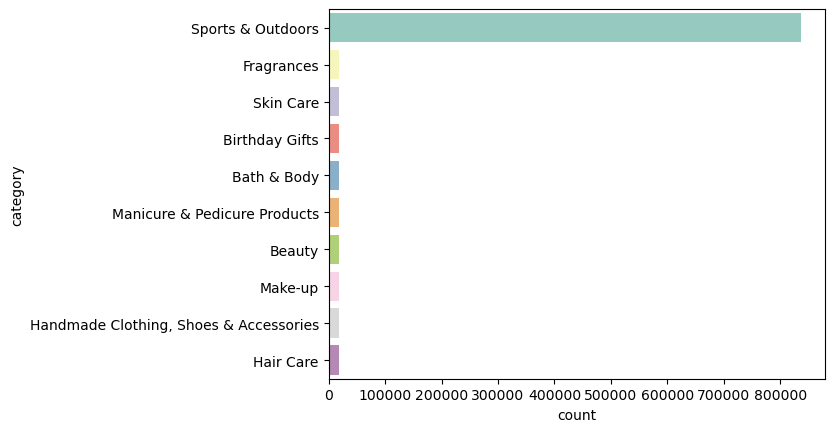

In [10]:
sns.countplot(data=subset_df, y='category', palette="Set3");

<Axes: ylabel='count'>

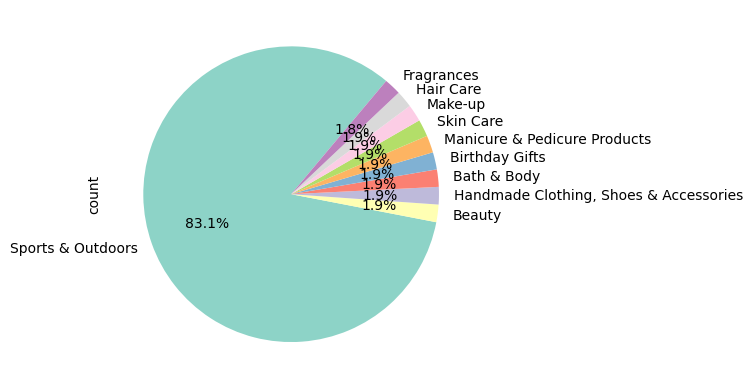

In [11]:
subset_df['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=50, colors=sns.color_palette("Set3"))

In [12]:
#2Calculate the mean, median, and mode for the price of products.
#What's the average price point of products listed?
#How does this compare with the most common price point (mode)?

In [13]:
df.head(1)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [14]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()

mean_price, median_price, mode_price,

(89.24380943923663,
 19.09,
 0    9.99
 Name: price, dtype: float64)

In [15]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [16]:
skewness_price = df['price'].skew()
kurtosis_price = df['price'].kurtosis()

skewness_price, kurtosis_price

(27.492977566280338, 4241.616412866518)

In [17]:
# the value 27 suggest that we have a right tail. Most of the prices tend to be higher than the mode(19.09) 
#The very high kurtosis shows that the dataset have a very high rate of outliers prices.

C:\Users\Davide\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

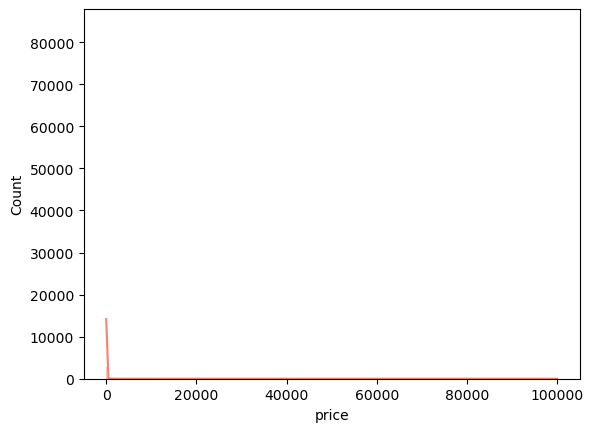

In [41]:
sns.histplot(df['price'], kde=True,bins=100 color="salmon")
#Higher pricec variate too much from the average to make an histogram.

<Axes: >

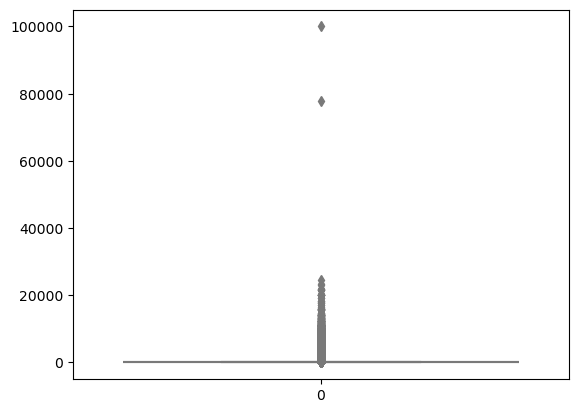

In [20]:
sns.boxplot(data = df['price'], color="lightblue")

In [21]:
#Measures of Centrality:

#Calculate the mean, median, and mode for the rating of products.
#How do customers generally rate products? Is there a common trend?
#Measures of Dispersion:

#Determine the variance, standard deviation, and interquartile range for product rating.
#Are the ratings consistent, or is there a wide variation in customer feedback?
#Shape of the Distribution:

#Calculate the skewness and kurtosis for the rating column.
#Are the ratings normally distributed, or do they lean towards higher or lower values?
#Visualizations:

#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [22]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()
mean_rating, median_rating, mode_rating,

(2.152836472966065,
 0.0,
 0    0.0
 Name: stars, dtype: float64)

In [23]:
df['stars'].isnull().sum

<bound method Series.sum of 0          False
1          False
2          False
3          False
4          False
           ...  
2443646    False
2443647    False
2443648    False
2443649    False
2443650    False
Name: stars, Length: 2443651, dtype: bool>

In [24]:
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
min_stars = df['stars'].min()
max_stars = df['stars'].max()
range_stars = max_stars - min_stars
quantiles_stars = df['stars'].quantile([0.25, 0.5, 0.75])

variance_stars, std_dev_stars, min_stars, max_stars, range_stars, quantiles_stars

(4.81743402976196,
 2.1948653785054697,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [25]:
df.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [26]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

In [27]:
# the left skewness of the rating show that most of the rating are in the left side,(lower) showing a trend of low/0 rates.
#the negative kurtosis show again that most of the ratings are low/0.

C:\Users\Davide\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

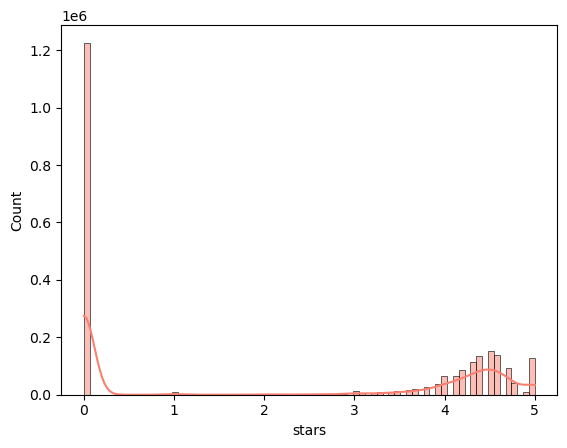

In [28]:
sns.histplot(df['stars'], kde=True, color="salmon")

<Axes: ylabel='count'>

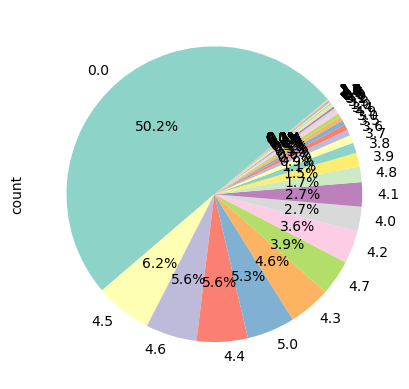

In [32]:
df['stars'].value_counts().plot.pie(autopct='%1.1f%%', startangle=40, colors=sns.color_palette("Set3"))